In [2]:
import json

import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from tqdm import tqdm

In [3]:
in_file = "/home/adrian/workspace/qa-generator-with-human-review/data/generated/merged_qa_pairs.json"
# load all question answer pairs
with open(in_file, "r") as f:
    qa_pairs = json.load(f)
    questions = [qa["question"] for qa in qa_pairs]
    answers = [qa["answer"] for qa in qa_pairs]

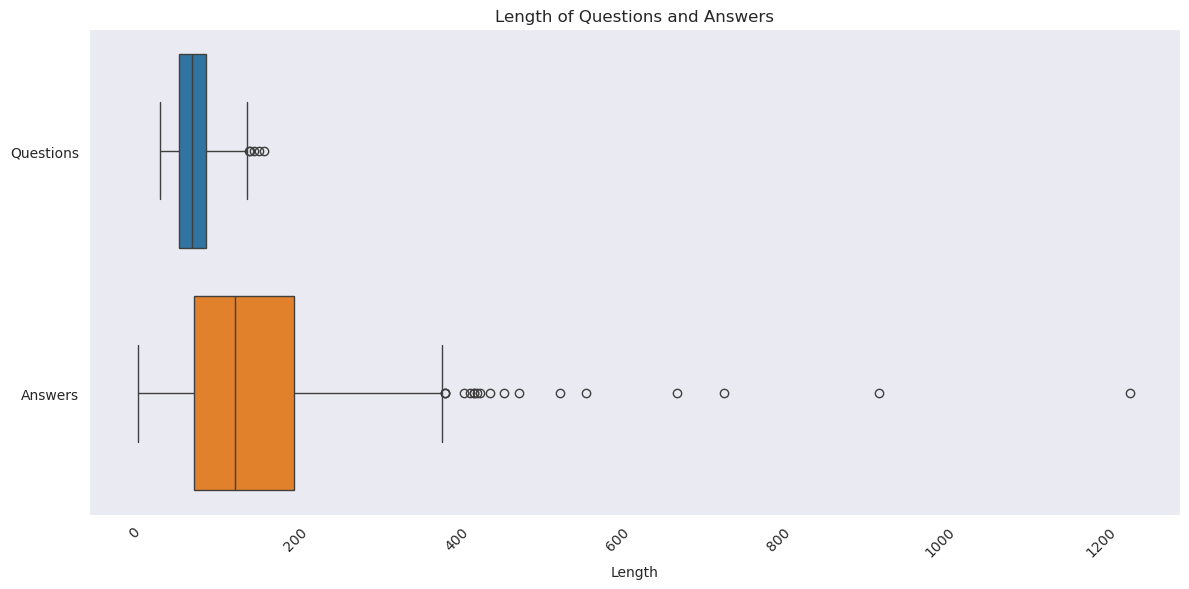

In [3]:
# compute char lengths of questions and answers
questions_lengths = [len(q) for q in questions]
answers_lengths = [len(a) for a in answers]

# box plot of question and answer lengths
plt.figure(figsize=(12, 6))
sns.boxplot(data=[questions_lengths, answers_lengths], orient="h")
plt.xlabel("Length")
plt.xticks(rotation=45)
plt.yticks([0, 1], ["Questions", "Answers"])
plt.title("Length of Questions and Answers")
plt.grid(axis="x")
plt.tight_layout()

In [4]:
# compute question and answers embeddings
st = SentenceTransformer("all-MiniLM-L12-v2", device="cpu")
questions_embeddings = st.encode(questions, show_progress_bar=True)
answers_embeddings = st.encode(answers, show_progress_bar=True)

Batches:   0%|          | 0/17 [00:00<?, ?it/s]

Batches:   0%|          | 0/17 [00:00<?, ?it/s]

In [5]:
# compute t-sne of question and answer embeddings
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
questions_tsne = tsne.fit_transform(questions_embeddings)
answers_tsne = tsne.fit_transform(answers_embeddings)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


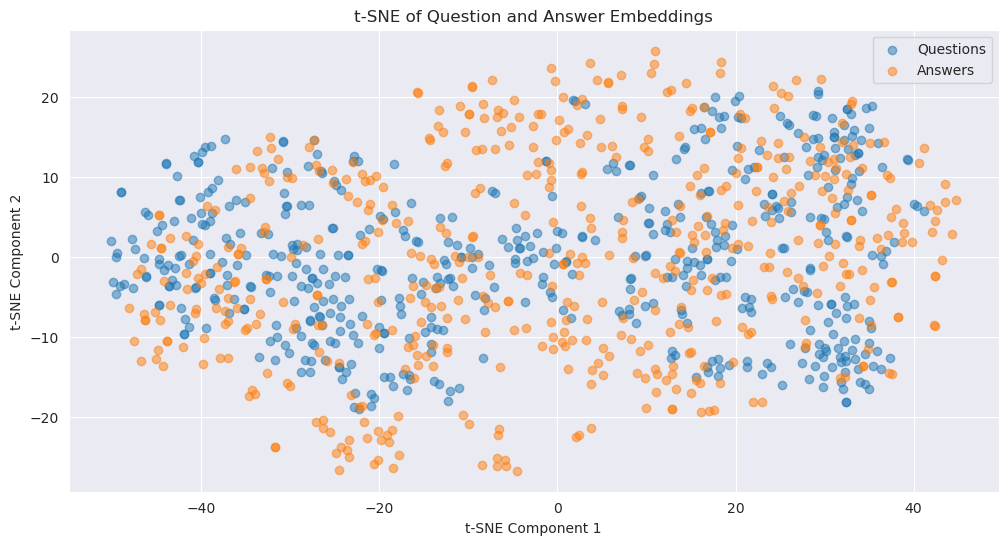

In [7]:
# plot t-sne of question and answer embeddings
plt.figure(figsize=(12, 6))
plt.scatter(questions_tsne[:, 0], questions_tsne[:, 1], label="Questions", alpha=0.5)
plt.scatter(answers_tsne[:, 0], answers_tsne[:, 1], label="Answers", alpha=0.5)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE of Question and Answer Embeddings")
plt.legend()

In [4]:
# print 20 random questions and answers
import random
random.seed(42)
sampled_indices = random.sample(range(len(questions)), 20)
for i in sampled_indices:
    print(f"Question: {questions[i]}")
    print(f"Answer: {answers[i]}")
    print("-" * 80)

Question: What is the issue date of the EUR 10,000,000 Floating Rate Preferred Senior Notes?
Answer: The issue date is 11 October 2019.
--------------------------------------------------------------------------------
Question: What is the corporate credit rating assigned to the Guarantor by Standard & Poor's?
Answer: The corporate credit rating assigned to the Guarantor by Standard & Poor's is 'A- with a positive outlook'.
--------------------------------------------------------------------------------
Question: Wann darf eine Kündigung nicht erfolgen?
Answer: Eine Kündigung darf nicht erfolgen, wenn zu dem Zeitpunkt, zu dem die Kündigung wirksam wird, die Verpflichtung zur Zahlung von zusätzlichen Beträgen nicht mehr wirksam ist.
--------------------------------------------------------------------------------
Question: Was sind die Kündigungsgründe im Rahmen der Schuldverschreibungen?
Answer: Kündigungsgründe im Rahmen der Schuldverschreibungen sind unter anderem eine 90 Tage andauern